In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_json('data/StreamingHistory1.json')
data0 = pd.read_json('data/StreamingHistory0.json')

In [5]:
data = pd.concat([data0,data1])

In [6]:
data['endTime'] = pd.to_datetime(data['endTime'])
data['msPlayed'] = pd.to_timedelta(data['msPlayed'], unit='ms')

In [7]:
data

,endTime,artistName,trackName,msPlayed
0,2019-05-16 02:16:00,The Beatles,Come Together - Remastered 2009,00:03:30.001000
1,2019-05-18 16:09:00,Hard GZ,Hereditario,00:03:28.050000
2,2019-05-18 16:12:00,C. Tangana,Pa' Llamar Tu Atención (feat. MC Bin Laden),00:02:57.613000
3,2019-05-18 16:16:00,Sharif,R.o.n.r.o.n.e.a,00:03:40.440000
4,2019-05-18 16:19:00,Kaydy Cain,HDP,00:03:33.666000
...,...,...,...,...
1398,2020-05-17 17:38:00,Freddie Gibbs,Fake Names,00:03:44.200000
1399,2020-05-17 17:40:00,Jay Electronica,Fruits Of The Spirit,00:01:34.507000
1400,2020-05-17 17:45:00,Nas,The World Is Yours,00:04:50.573000
1401,2020-05-17 17:47:00,The Alchemist,E. Coli (feat. Earl Sweatshirt),00:02:12.147000


In [8]:
lockdown = data[(data['endTime']>pd.to_datetime('2020-03-12'))&(data['artistName']!='Nas')]

In [9]:
top = lockdown.groupby('trackName').sum().sort_values('msPlayed', ascending=False).head(6)

In [10]:
df = lockdown[(lockdown['trackName'].isin(top.index))]

In [11]:
#df['minPlayed'] = df['msPlayed'].apply(lambda x:x.total_seconds()//60)

In [12]:
df['sPlayed'] = df['msPlayed'].apply(lambda x:x.total_seconds())

/Users/admin/Documents/Fun/Projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df['day'] = df['endTime'].apply(lambda x:x.date())

/Users/admin/Documents/Fun/Projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['week'] = df['endTime'].apply(lambda x:x.week)

/Users/admin/Documents/Fun/Projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
count = df.groupby(['trackName', 'artistName']).sum().sort_values('sPlayed').reset_index()

In [16]:
count

,trackName,artistName,sPlayed,week
0,Ora,Ludovico Einaudi,2840.958,86
1,Institutionalized,Kendrick Lamar,3059.494,221
2,King Kunta,Kendrick Lamar,3092.594,308
3,Wesley's Theory,Kendrick Lamar,3150.550,219
4,Nunca Estoy,C. Tangana,3447.163,501
5,Good News,Mac Miller,4091.095,200


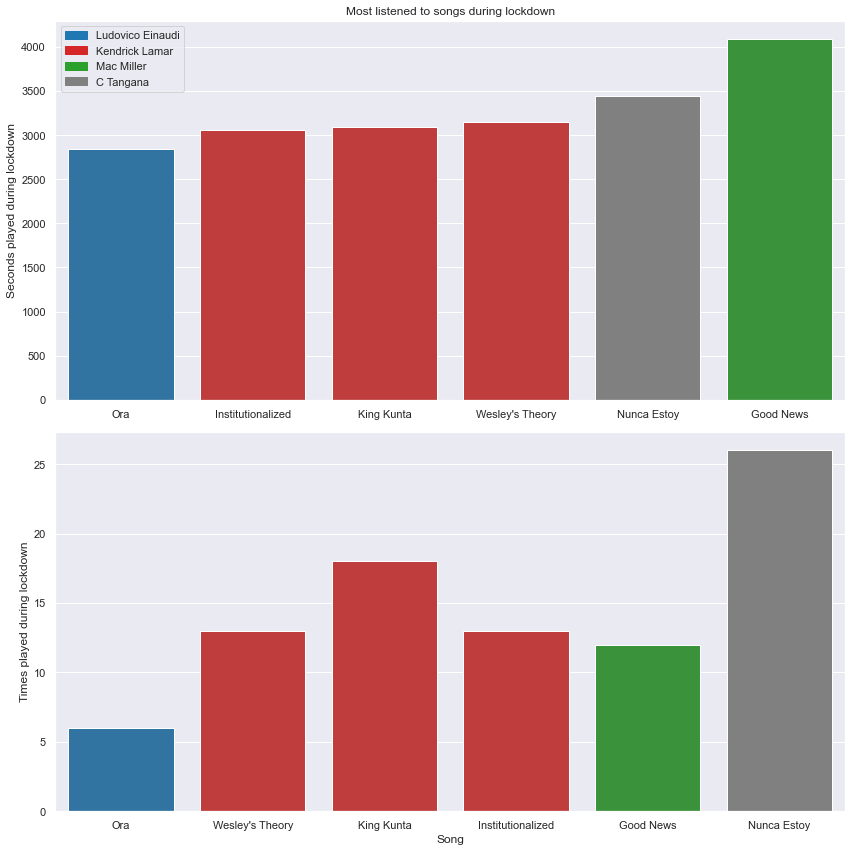

In [19]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(2,1, figsize=(12,12))
colors = {'Ora': "tab:blue", 'Wesley\'s Theory':"tab:red", 'King Kunta':'tab:red', 'Institutionalized':'tab:red', 'Good News':"tab:green", 'Nunca Estoy': "gray"}
sns.barplot(x="trackName", y="sPlayed", data=count, palette=colors, ci=None, orient='v', ax=ax[0])
patches = [mpatches.Patch(color='tab:blue', label='Ludovico Einaudi'), mpatches.Patch(color='tab:red', label='Kendrick Lamar'), 
           mpatches.Patch(color='tab:green', label='Mac Miller'), mpatches.Patch(color='gray', label='C Tangana')]
ax[0].set_xlabel('')
ax[0].set_ylabel('Seconds played during lockdown')
ax[0].set_title('Most listened to songs during lockdown')
ax[0].legend(handles=patches, loc='upper left')

sns.countplot(x="trackName", data=df, palette=colors, orient='v', ax=ax[1])
ax[1].set_xlabel('Song')
ax[1].set_ylabel('Times played during lockdown')

plt.tight_layout()